In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score



In [198]:

df = pd.read_csv("/content/drive/MyDrive/SEM3_Coursework_AI/Food_Delivery_Times .csv")
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [199]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [201]:
df.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

**PREPROCESSING**

In [202]:
df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


In [203]:
df.dropna(axis=0,inplace=True)

In [204]:
df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,0
Delivery_Time_min,0


In [205]:
df["Time_of_Day"].unique()

array(['Afternoon', 'Evening', 'Night', 'Morning'], dtype=object)

In [206]:
df["Weather"].unique()

array(['Windy', 'Clear', 'Foggy', 'Rainy', 'Snowy'], dtype=object)

In [207]:
df["Traffic_Level"].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [208]:
df = pd.get_dummies(df, columns=['Vehicle_Type'], prefix='is_',dtype=int)

In [209]:
#for weather
df = pd.get_dummies(df, columns=['Weather'], prefix='is_',dtype=int)

In [210]:
#for traffic level
mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Traffic_Level'] = df['Traffic_Level'].map(mapping)


In [211]:
df = df.drop("Time_of_Day",axis=1)

In [212]:
df.head()

,Order_ID,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,is__Bike,is__Car,is__Scooter,is__Clear,is__Foggy,is__Rainy,is__Snowy,is__Windy
0,522,7.93,1,12,1.0,43,0,0,1,0,0,0,0,1
1,738,16.42,2,20,2.0,84,1,0,0,1,0,0,0,0
2,741,9.52,1,28,1.0,59,0,0,1,0,1,0,0,0
3,661,7.44,2,5,1.0,37,0,0,1,0,0,1,0,0
4,412,19.03,1,16,5.0,68,1,0,0,1,0,0,0,0


In [213]:
df.columns = df.columns.str.strip()

**Visualization**

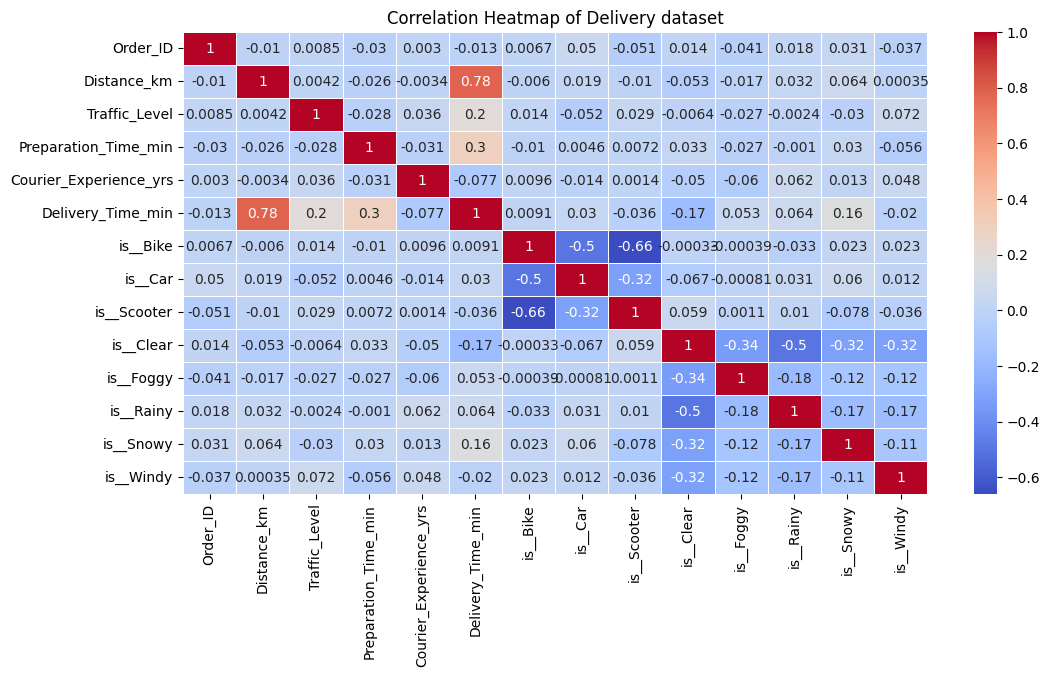

In [214]:
plt.figure(figsize=(12, 6))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Delivery dataset")
plt.show()

In [215]:
X = df.drop("Delivery_Time_min", axis = 1)
Y = df["Delivery_Time_min"]

In [216]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 42)

In [217]:
#scaling initialization
scaler = StandardScaler()

In [218]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [219]:
import numpy as np

class LinearRegressionScratch:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]
        self.coef_ = np.linalg.solve(X.T @ X, X.T @ y)
        self.intercept_ = self.coef_[0]
        self.coef_ = self.coef_[1:]

    def predict(self, X):
        return X @ self.coef_ + self.intercept_

In [220]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lin_reg_scratch = LinearRegressionScratch()
lin_reg_scratch.fit(X_train, Y_train)
y_pred_scratch = lin_reg_scratch.predict(X_test)

print("Linear Regression from Scratch:")
print("MAE:", mean_absolute_error(Y_test, y_pred_scratch))
print("RMSE:", np.sqrt(mean_squared_error(Y_test, y_pred_scratch)))
print("R2 Score:", r2_score(Y_test, y_pred_scratch))

Linear Regression from Scratch:
MAE: 5.791395221018448
RMSE: 9.007390993834912
R2 Score: 0.8148818183389384


**Build Two Models for Regression**

 Model-1: Decision Tree Regression

In [221]:
tree_reg = DecisionTreeRegressor(max_depth=5)
tree_reg.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=5)

In [222]:
y_pred = tree_reg.predict(X_test)


In [223]:
mse = mean_squared_error(Y_test, y_pred)
r2_tree = r2_score(Y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2_tree:.4f}")


Mean Squared Error: 167.4904
R² Score: 0.6178


Model 2  Random Forest Regression

In [224]:
rf_reg = RandomForestRegressor(n_estimators=1000, max_depth=5, random_state=42)
rf_reg.fit(X_train, Y_train)
y_pred = rf_reg.predict(X_test)

In [225]:
mse = mean_squared_error(Y_test, y_pred)
r2_rf = r2_score(Y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2_rf:.4f}")

Mean Squared Error: 115.5411
R² Score: 0.7364


In [226]:
#which one is best model?
if r2_rf > r2_tree:
    print("\nThe Random Forest model performs better.")
    best_model = rf_reg
else:
    print("\nThe Decision Tree model performs better.")


The Random Forest model performs better.


**Perform Hyper-parameter Optimizations with Cross Validations for both the Models.**

In [227]:
print("Cross-validation results for Model-1:")
cross_val_model_1 = cross_val_score(tree_reg, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
print("Mean CV RMSE:", np.sqrt(-cross_val_model_1.mean()))

Cross-validation results for Model-1:
Mean CV RMSE: 13.975799973929966


In [228]:
print("Cross-validation results for Model-2:")
cross_val_model_2 = cross_val_score(rf_reg, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
print("Mean CV RMSE:", np.sqrt(-cross_val_model_2.mean()))

Cross-validation results for Model-2:
Mean CV RMSE: 12.27296309845867


**Perform Feature Selection to determine the subset of best features for both the Models.**

---



For Decision Tree

In [229]:
param_grid_tree = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [230]:
grid_search_tree = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_tree, cv=5, scoring='r2', n_jobs=-1)
grid_search_tree.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [231]:
# Best Parameters
print("Best Parameters for Decision Tree:", grid_search_tree.best_params_)

Best Parameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


For Random Forest

In [232]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 7, 10],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

In [192]:
# Perform Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, Y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}


**FINAL MODEL**

In [194]:
best_rf = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, Y_train)




RandomForestRegressor(max_depth=10, min_samples_leaf=4, n_estimators=500,
                      random_state=42)

In [195]:
y_pred_best = best_rf.predict(X_test)

In [196]:
# New Performance
mse_best = mean_squared_error(Y_test, y_pred_best)
r2_best = r2_score(Y_test, y_pred_best)

print(f"Optimized MSE: {mse_best:.4f}")
print(f"Optimized R² Score: {r2_best:.4f}")

Optimized MSE: 105.8708
Optimized R² Score: 0.7584


 **Result- Did the Model Performance Improved?**

In [234]:
if r2_score(Y_test, y_pred_best) > max(r2_score(Y_test, tree_reg.predict(X_test)), r2_score(Y_test, rf_reg.predict(X_test))):
    print("The final model with best hyperparameters and selected features performed better than the initial models.")
else:
    print("The performance of the final model did not improve significantly compared to the initial models.")

The final model with best hyperparameters and selected features performed better than the initial models.
